A **Decision Tree** is a heirarchical data structure and a non parametric method that can be used for both **classification** and **regression** tasks in machine learning.

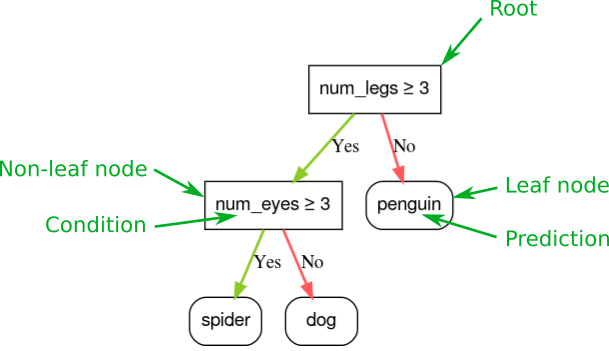

*Source: https://developers.google.com/machine-learning/decision-forests/decision-trees*



Using **Entropy** and **Information Gain**, we determine the root and nodes, until we arrive at the leaf nodes (classes/labels/predictions).

In this project, I demonstrated how to use the decision tree algorithm to label classes using the popular *Iris dataset*.

In [1]:
# import relevant libraries and packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X[:3], y[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [0 0 0]


In [3]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

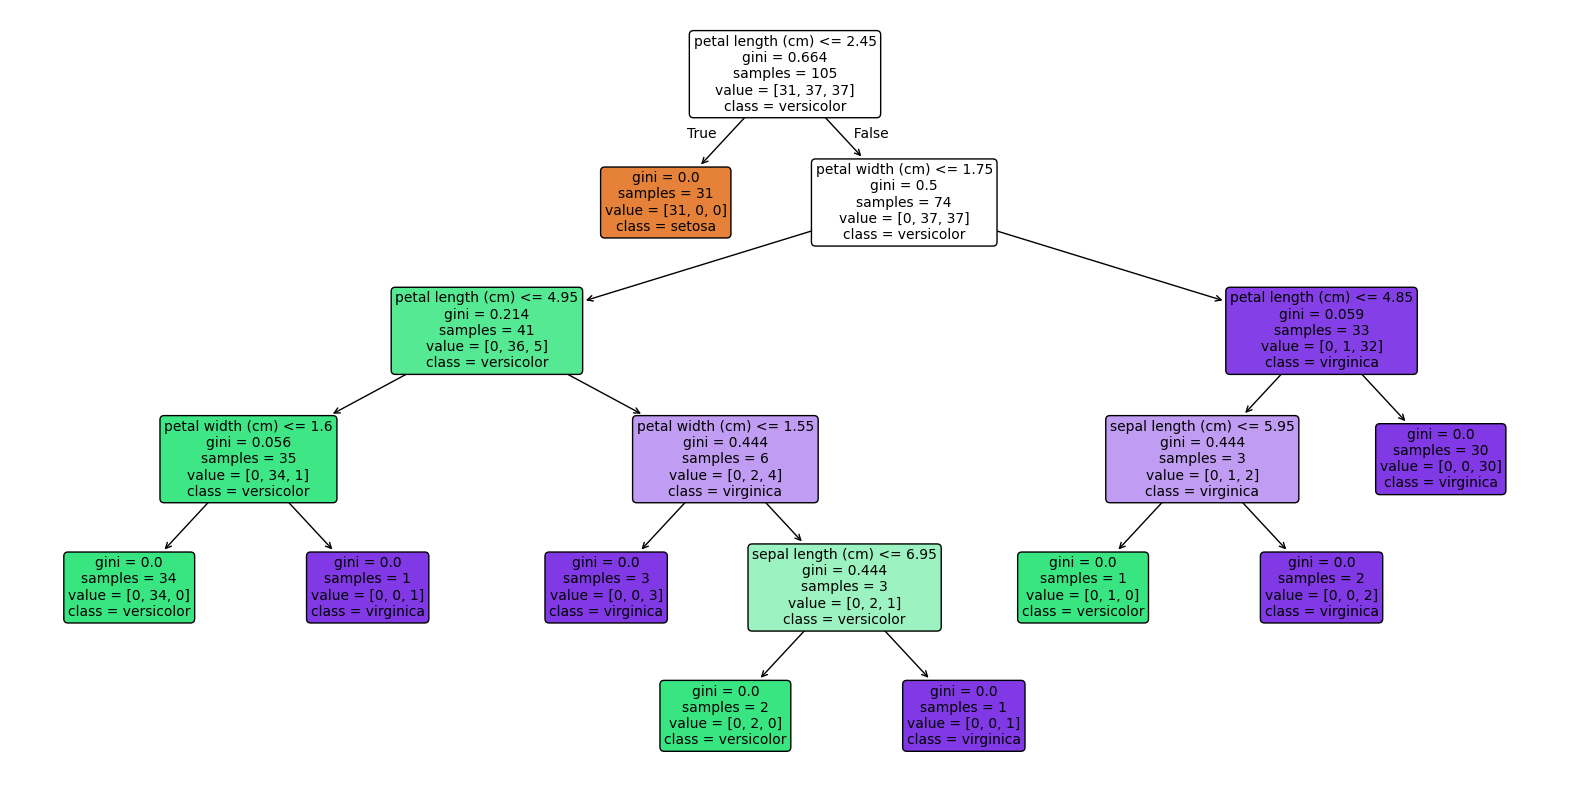

In [8]:
# create the model object
dt = DecisionTreeClassifier()

# fit the model with the training data
dt.fit(X_train, y_train)

# visiualize the model
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, fontsize=10)
plt.show()

In [9]:
# using the testing data, test the performance of the model
y_pred = dt.predict(X_test)

In [10]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred) # computes the accuracy score
print(f"Accuracy Score is: {accuracy*100:.1f}%")

Accuracy Score is: 100.0%


In [11]:
# show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


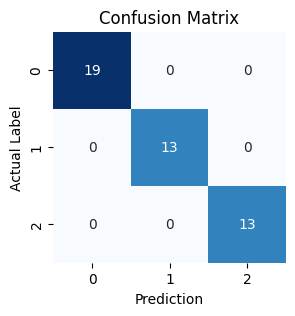

In [12]:
# plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Prediction')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

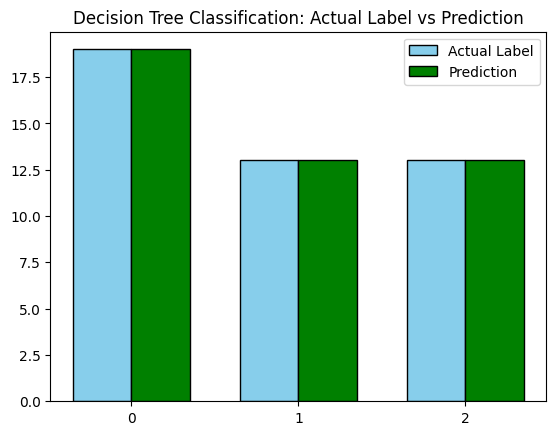

In [14]:
# plot other visualization(s) to show the performance of the model on testing data
from collections import Counter
import numpy as np

# count the frequency of each value in both datasets
value_counts1 = Counter(y_test)
value_counts2 = Counter(y_pred)

# extract the unique values and their counts
values = sorted(value_counts1.keys())  # Ensure the values are sorted
counts1 = [value_counts1[val] for val in values]
counts2 = [value_counts2[val] for val in values]

# set up the positions for the bars
x = np.arange(len(values))  # x-axis positions for the groups
width = 0.35  # width of the bars

# create a clustered column chart
plt.bar(x - width/2, counts1, width, color='skyblue', edgecolor='black', label='Actual Label')
plt.bar(x + width/2, counts2, width, color='green', edgecolor='black', label='Prediction')

# add labels, title, and legend
plt.xlabel('')
plt.ylabel('')
plt.title('Decision Tree Classification: Actual Label vs Prediction')
plt.xticks(x, values)  # ensure x-axis ticks match the unique values
plt.legend()
plt.show()